In [1]:
# Importing Pandas and Numpy.

import pandas as pd
import numpy as np

In [2]:
#Looking into the data

df = pd.read_csv('movies.csv')
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [4]:
#Lets see for missing values and percentage of missing values.

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} {}%'. format(col,missing))

name 0.0%
rating 0.010041731872717789%
genre 0.0%
year 0.0%
released 0.0002608242044861763%
score 0.0003912363067292645%
votes 0.0003912363067292645%
director 0.0%
writer 0.0003912363067292645%
star 0.00013041210224308815%
country 0.0003912363067292645%
budget 0.2831246739697444%
gross 0.02464788732394366%
company 0.002217005738132499%
runtime 0.0005216484089723526%


In [5]:
# Counting the number of missing values in each row.
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
# Fillout the missing values with various methods.
df['rating'] = df['rating'].fillna(method='backfill')
df['budget']= df['budget'].interpolate()
df['gross']= df['gross'].interpolate()


In [16]:
# Dropping of the missing values.
df = df.dropna()

In [19]:
# Cleared the missing values .
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} {}%'. format(col,missing))

name 0.0%
rating 0.0%
genre 0.0%
year 0.0%
released 0.0%
score 0.0%
votes 0.0%
director 0.0%
writer 0.0%
star 0.0%
country 0.0%
budget 0.0%
gross 0.0%
company 0.0%
runtime 0.0%


In [26]:
# Final shape of the dataset.
df.shape

(7641, 15)

In [32]:
# Finding the Correlation between numerical pairs. 
df.corr()

# As we can observe budget is +vely correlated with gross.

,year,score,votes,budget,gross,runtime
year,1.000000,0.098909,0.223701,0.354225,0.260247,0.120125
score,0.098909,1.000000,0.409370,0.081268,0.185550,0.399844
votes,0.223701,0.409370,1.000000,0.448499,0.631184,0.308852
budget,0.354225,0.081268,0.448499,1.000000,0.705310,0.270995
gross,0.260247,0.185550,0.631184,0.705310,1.000000,0.243353
runtime,0.120125,0.399844,0.308852,0.270995,0.243353,1.000000


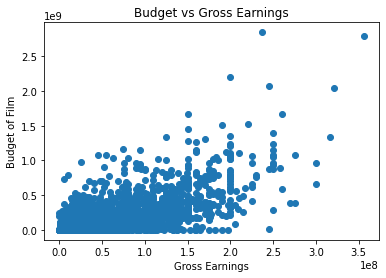

In [33]:

#Scatter plot for Budget and Gross
import matplotlib.pyplot as plt 
import seaborn as sns

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget of Film')
plt.show()

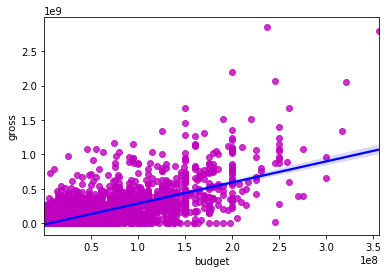

In [38]:
# Plotting the same budget & gross using seaborn to show a positive correlation with a line.

sns.regplot(x='budget',y='gross', data=df,color="m",line_kws={"color":"blue"})

Text(0.5, 1.0, 'Correlation for Numeric Features')

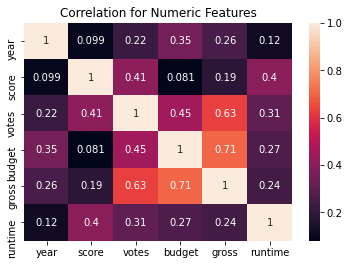

In [41]:
# Correlation using Heatmap.
correlation_variables = df.corr()
sns.heatmap(correlation_variables,annot=True)
plt.title('Correlation for Numeric Features')

In [43]:
df_numeric = df

for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype =='object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes
df_numeric

<ipython-input-43-a376c81de2fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[col_name] = df_numeric[col_name].astype('category')
<ipython-input-43-a376c81de2fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[col_name] = df_numeric[col_name].cat.codes


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6564,6,6,1980,1700,8.4,927000.0,2575,3997,1041,54,1.900000e+07,46998772.0,2311,146.0
1,5553,6,1,1980,1487,5.8,65000.0,2258,1628,325,55,4.500000e+06,58853106.0,727,104.0
2,5125,4,0,1980,1766,8.7,1200000.0,1108,2558,1737,55,1.800000e+07,538375067.0,1533,124.0
3,285,4,4,1980,1487,7.7,221000.0,1296,1994,2236,55,3.500000e+06,83453539.0,1804,88.0
4,1026,6,4,1980,1538,7.3,108000.0,1051,518,408,55,6.000000e+06,39846344.0,1770,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7654,5110,9,14,2020,3390,5.7,165.0,1584,2401,2241,55,3.700000e+05,120333405.0,182,85.0
7656,6996,5,4,2020,1881,5.0,294.0,2498,3854,2367,55,1.875000e+05,413378.0,1897,120.0
7658,797,6,6,2020,1102,6.6,35.0,1760,1065,527,55,5.000000e+03,12916074.0,1741,78.0
7659,2647,3,9,2020,2139,3.4,447.0,1604,2457,1526,55,3.366667e+05,13266.0,1984,87.0


In [51]:
# Correlation between all variables.
df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011258,0.015052,0.011979,-0.010420,0.016458,0.013223,0.008786,0.009784,0.006088,-0.010959,0.019680,0.006911,0.010344,0.010581
rating,-0.011258,1.000000,0.118882,0.024583,0.023804,0.012023,0.015501,0.016560,-0.004675,0.007540,0.037281,-0.130620,-0.130436,-0.077444,0.070144
genre,0.015052,0.118882,1.000000,-0.085262,0.030504,0.040043,-0.150092,-0.016809,0.005164,-0.005170,-0.036858,-0.317183,-0.238365,-0.072892,-0.045006
year,0.011979,0.024583,-0.085262,1.000000,-0.000152,0.098909,0.223701,-0.021327,-0.008037,-0.028842,-0.068497,0.354225,0.260247,-0.010455,0.120125
released,-0.010420,0.023804,0.030504,-0.000152,1.000000,0.043475,0.016191,-0.001490,-0.002550,0.016936,-0.022171,0.012480,0.000733,-0.009995,0.000033
score,0.016458,0.012023,0.040043,0.098909,0.043475,1.000000,0.409370,0.008752,0.019160,-0.001547,-0.133077,0.081268,0.185550,-0.002314,0.399844
votes,0.013223,0.015501,-0.150092,0.223701,0.016191,0.409370,1.000000,0.000608,0.000776,-0.019696,0.073462,0.448499,0.631184,0.131616,0.308852
director,0.008786,0.016560,-0.016809,-0.021327,-0.001490,0.008752,0.000608,1.000000,0.299395,0.039751,0.019490,-0.003649,-0.014493,0.004687,0.017900
writer,0.009784,-0.004675,0.005164,-0.008037,-0.002550,0.019160,0.000776,0.299395,1.000000,0.026920,0.015742,-0.021972,-0.023238,0.003567,-0.003195
star,0.006088,0.007540,-0.005170,-0.028842,0.016936,-0.001547,-0.019696,0.039751,0.026920,1.000000,-0.014565,-0.020720,-0.001508,0.010245,0.008853
